In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the cleaned dataset
df = pd.read_csv("final.csv")
df

,Unnamed: 0,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Male,0,Yes,34,Fiber optic,No,No,No,No,One year,Yes,Bank transfer (automatic),78.95,2647.20,No
1,1,Male,0,Yes,70,DSL,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.95,5931.75,No
2,2,Female,0,No,69,Fiber optic,No,No,Yes,Yes,Two year,No,Electronic check,104.00,7028.50,No
3,3,Female,0,No,5,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.55,96.10,No
4,4,Female,0,Yes,72,Fiber optic,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.10,8248.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,3733,Male,0,No,12,DSL,No,No,No,Yes,One year,Yes,Electronic check,59.80,727.80,Yes
3734,3734,Female,0,No,9,DSL,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
3735,3735,Male,1,No,1,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
3736,3736,Female,0,No,67,Fiber optic,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [3]:
df = df.drop("Unnamed: 0",axis=1)

In [4]:
df.shape

(3738, 15)

<AxesSubplot:ylabel='Churn'>

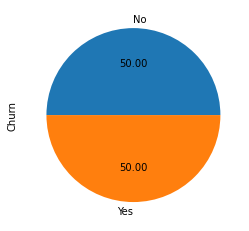

In [5]:
df.Churn.value_counts().plot(kind='pie',autopct="%0.2f")

# Label Encoder

In [6]:
col = df.columns[df.dtypes=="object"]

from sklearn.preprocessing import LabelEncoder

for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [7]:
df

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,34,1,0,0,0,0,1,1,0,78.95,2647.20,0
1,1,0,1,70,0,0,2,2,2,2,1,1,85.95,5931.75,0
2,0,0,0,69,1,0,0,2,2,2,0,2,104.00,7028.50,0
3,0,0,0,5,2,1,1,1,1,0,0,1,20.55,96.10,0
4,0,0,1,72,1,2,2,2,2,2,1,0,113.10,8248.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,12,0,0,0,0,2,1,1,2,59.80,727.80,1
3734,0,0,0,9,0,0,0,0,0,0,1,0,44.20,403.35,1
3735,1,1,0,1,1,0,0,0,0,0,1,2,75.75,75.75,1
3736,0,0,0,67,1,2,2,2,0,0,1,1,102.95,6886.25,1


In [8]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

# Modeling

1) Logistic

2) SVM

3) Random Forest

4) XGBoosting

5) LGBM

6) Naive Bayes

create datafrme with model and their accuracy

decide the best with the help of confusion matrix or kfold testing

# Features Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7475935828877005

In [13]:
confusion_matrix(y_test,y_pred)

array([[332, 131],
       [105, 367]], dtype=int64)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       463
           1       0.74      0.78      0.76       472

    accuracy                           0.75       935
   macro avg       0.75      0.75      0.75       935
weighted avg       0.75      0.75      0.75       935



In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
model1 = LogisticRegression()

results = cross_val_score(model1, x,y, cv=kfold)

In [16]:
results.min(),results.max()

(0.6229946524064172, 0.7914438502673797)

In [17]:
results.std()

0.052307351556872446

In [18]:
results.mean()

0.7065368238448194

In [19]:
#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier


kfold = KFold(n_splits=10)
model2 = RandomForestClassifier()

results = cross_val_score(model2, x,y, cv=kfold)

print("Average Accuracy",results.mean())
print("SD ",results.std())

Average Accuracy 0.7075912890137777
SD  0.028490216302039437


In [20]:
results.min(),results.max()

(0.6684491978609626, 0.7620320855614974)

In [21]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [22]:
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGboost',XGBClassifier()))

In [23]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.706537 (0.052307)
KNN: 0.672298 (0.048434)
RF: 0.707863 (0.020940)
NB: 0.733293 (0.048830)
SVM: 0.703326 (0.043394)
XGboost: 0.691017 (0.026541)


In [24]:
print("After the analysis of model, we finalize the Random forest based on avg accuracy and std")

After the analysis of model, we finalize the Random forest based on avg accuracy and std


# Hyperparameter Tuning

In [25]:
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
model2 = RandomForestClassifier(criterion="entropy")

results = cross_val_score(model2, x,y, cv=kfold)

print("Average Accuracy",results.mean())
print("SD ",results.std())
print(results.min(),results.max())

Average Accuracy 0.7027791716247795
SD  0.021940779537509506
0.6657754010695187 0.7433155080213903


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model2 = RandomForestClassifier()
kfold = KFold(n_splits=10)
param = {"n_estimators":[50,100,200,150],"max_depth":[6,8,12]}
grid = GridSearchCV(model2,param_grid=param,cv=kfold)
grid_result = grid.fit(x,y)

In [28]:
grid_result.best_score_

0.7255322504336854

In [29]:
grid_result.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [30]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

0.7236634600220785,0.048483000143513935 with: {'max_depth': 6, 'n_estimators': 50}
0.7223222606127511,0.04718086005792919 with: {'max_depth': 6, 'n_estimators': 100}
0.7220541640980058,0.04590351829865499 with: {'max_depth': 6, 'n_estimators': 200}
0.7188463247838741,0.04919844638561729 with: {'max_depth': 6, 'n_estimators': 150}
0.7188491921262778,0.042829286793947784 with: {'max_depth': 8, 'n_estimators': 50}
0.7255322504336854,0.04302075153462117 with: {'max_depth': 8, 'n_estimators': 100}
0.7231215323077806,0.03873630307213376 with: {'max_depth': 8, 'n_estimators': 200}
0.7244598643747043,0.035811689308513785 with: {'max_depth': 8, 'n_estimators': 150}
0.7137481899901076,0.03141013956039907 with: {'max_depth': 12, 'n_estimators': 50}
0.7166958179811042,0.038010408628139244 with: {'max_depth': 12, 'n_estimators': 100}
0.7196384281228942,0.03508429507082832 with: {'max_depth': 12, 'n_estimators': 200}
0.7183008128915714,0.036702456015724604 with: {'max_depth': 12, 'n_estimators': 150

In [31]:
model2 = RandomForestClassifier(max_depth=8)
kfold = KFold(n_splits=10)
param = {"n_estimators":[20,30,50,100]}
grid = GridSearchCV(model2,param_grid=param,cv=kfold)
grid_result = grid.fit(x,y)

In [32]:
grid_result.best_score_

0.724193201531161

In [33]:
grid_result.best_params_

{'n_estimators': 100}